In [1]:
import pandas

# Load data

In [2]:
df = pandas.read_csv("data/dataset.csv")

In [3]:
df["TIME"] = pandas.to_datetime(df["TIME"], format="%Y-%m-%d %H:%M:%S")

In [4]:
df = df.set_index("TIME")

In [5]:
df = df.sort_index()

In [6]:
df = df.reset_index()

In [7]:
df

,TIME,STATION ID,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2018-08-01 12:30:02,1,2018-08-01 12:26:05,CLARENDON ROW,31,1,30,Open,Clarendon Row,53.340927,-6.262501
1,2018-08-01 12:30:02,93,2018-08-01 12:26:33,HEUSTON STATION (CENTRAL),40,40,0,Open,Heuston Station (Central),53.346603,-6.296924
2,2018-08-01 12:30:02,92,2018-08-01 12:18:49,HEUSTON BRIDGE (NORTH),40,38,2,Open,Heuston Bridge (North),53.347801,-6.292432
3,2018-08-01 12:30:02,14,2018-08-01 12:20:28,FOWNES STREET UPPER,30,4,26,Open,Fownes Street Upper,53.344604,-6.263371
4,2018-08-01 12:30:02,91,2018-08-01 12:26:27,SOUTH DOCK ROAD,30,10,20,Open,South Dock Road,53.341831,-6.231291
...,...,...,...,...,...,...,...,...,...,...,...
41898481,2023-12-26 00:30:03,32,2023-12-26 00:28:13,PEARSE STREET,30,24,6,OPEN,Pearse Street,53.344300,-6.250430
41898482,2023-12-26 00:30:03,31,2023-12-26 00:27:36,PARNELL STREET,20,5,15,OPEN,Parnell Street,53.350900,-6.265120
41898483,2023-12-26 00:30:03,30,2023-12-26 00:21:52,PARNELL SQUARE NORTH,20,18,2,OPEN,Parnell Square North,53.353500,-6.265310
41898484,2023-12-26 00:30:03,27,2023-12-26 00:28:18,MOLESWORTH STREET,20,10,10,OPEN,Molesworth Street,53.341300,-6.258120


In [8]:
print("Count of Bike Stands - AVAILABLE BIKE STANDS == AVAILABLE BIKES")
print((df["BIKE STANDS"]-df["AVAILABLE BIKE STANDS"] == df["AVAILABLE BIKES"]).value_counts())

Count of Bike Stands - AVAILABLE BIKE STANDS == AVAILABLE BIKES
True     39774829
False     2123657
Name: count, dtype: int64


In [9]:
gaps = df["TIME"].diff()

In [10]:
minDate = min(df["TIME"])
maxDate = max(df["TIME"])
largestGap = df["TIME"].diff().max()

print(f"Date ranges from {minDate} to {maxDate}. Largest gap between dates is {largestGap}")

Date ranges from 2018-08-01 12:30:02 to 2023-12-26 00:30:03. Largest gap between dates is 18 days 15:30:00


In [19]:
df["BIKE USAGE"] = 1-(df["AVAILABLE BIKES"]/(df["AVAILABLE BIKES"]+df["AVAILABLE BIKE STANDS"]))

# Separate metadata and time series

In [33]:
stationIDs = df["STATION ID"].unique()
stationID_to_lat = dict({stationID: df[df["STATION ID"] == stationID].iloc[0]["LATITUDE"] for stationID in stationIDs})
stationID_to_lon = dict({stationID: df[df["STATION ID"] == stationID].iloc[0]["LONGITUDE"] for stationID in stationIDs})

In [34]:
print(stationID_to_lat)
print(stationID_to_lon)

{1: 53.340927, 93: 53.346603, 92: 53.347801, 14: 53.344604, 91: 53.341831, 90: 53.344154, 15: 53.355473, 89: 53.335213, 16: 53.347507, 88: 53.348801, 87: 53.347477, 17: 53.340801, 86: 53.347973, 18: 53.334122, 85: 53.338776, 84: 53.339005, 19: 53.334431, 83: 53.340714, 21: 53.342178, 82: 53.341644, 81: 53.339985, 22: 53.345921, 80: 53.341358, 79: 53.358116, 13: 53.336075, 23: 53.348278, 94: 53.346985, 95: 53.343899, 110: 53.356308, 3: 53.351181, 108: 53.359406, 4: 53.346874, 107: 53.359158, 106: 53.358929, 5: 53.330662, 105: 53.355953, 6: 53.343369, 104: 53.355171, 103: 53.354664, 7: 53.343567, 102: 53.354931, 101: 53.350292, 8: 53.347885, 100: 53.347107, 9: 53.343033, 99: 53.346638, 98: 53.341515, 10: 53.344006, 97: 53.342113, 11: 53.334019, 96: 53.341805, 12: 53.359245, 78: 53.359966, 24: 53.35215, 77: 53.348873, 59: 53.35561, 36: 53.337826, 58: 53.339218, 57: 53.33963, 37: 53.337494, 56: 53.337959, 38: 53.350975, 55: 53.33403, 54: 53.336021, 39: 53.332382, 53: 53.337132, 40: 53.3483

In [236]:
timeseries = df[["TIME", "STATION ID", "BIKE USAGE"]]

# Resample to 1 hour bins

In [237]:
times = pandas.DatetimeIndex(pandas.date_range(start="2018-08-01 12:00:00", end="2023-12-26 01:00:00", freq="1h"), freq="1h")

In [238]:
def resampleGroup(dataframe):
    resampled = dataframe.resample("1h", on="TIME").mean().dropna().reindex(times, method="nearest")
    return resampled

In [239]:
timeseries = timeseries.groupby("STATION ID").apply(resampleGroup)

In [240]:
timeseries = timeseries.drop(columns=["STATION ID"])

In [241]:
timeseries = timeseries.reset_index().set_index("level_1").sort_index()
timeseries.index.name = "TIME"

In [242]:
timeseries[timeseries["STATION ID"] == 4]["2019-06-20":]

,STATION ID,BIKE USAGE
TIME,,
2019-06-20 00:00:00,4,0.535714
2019-06-20 01:00:00,4,0.535714
2019-06-20 02:00:00,4,0.535714
2019-06-20 03:00:00,4,0.535714
2019-06-20 04:00:00,4,0.535714
...,...,...
2023-12-25 21:00:00,4,0.550000
2023-12-25 22:00:00,4,0.600000
2023-12-25 23:00:00,4,0.600000


# Load weather

In [244]:
weather = pandas.read_csv("data/phoenixParkWeather.csv")

/tmp/ipykernel_229370/4020597585.py:1: DtypeWarning: Columns (8,9,14,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  weather = pandas.read_csv("data/phoenixParkWeather.csv")


In [245]:
weather["date"] = pandas.to_datetime(weather["date"], format="%d-%b-%Y %H:%M")

In [246]:
weather = weather.rename(columns={"date": "TIME"})

In [247]:
weather = weather.sort_values("TIME")

# Combine weather and bike data

In [248]:
data = pandas.merge_asof(timeseries, weather, on="TIME", direction="backward")

In [249]:
# Day of week ranges 0-6 whereas month ranges 1-12. Make ranges equal.
data["DAY OF WEEK"] = data["TIME"].dt.dayofweek
data["MONTH OF YEAR"] = data["TIME"].dt.month-1
data["HOUR OF DAY"] = data["TIME"].dt.hour
data["MINUTE OF HOUR"] = data["TIME"].dt.minute

In [250]:
data = data.set_index("TIME", drop=False)

In [251]:
data = data.sort_index()

# Data splits

In [252]:
prePandemic = data[:"2020-03-27"]
pandemic = data["2020-03-27":"2022-02-28"]
postPandemic = data["2022-02-28":]

In [253]:
total = len(prePandemic)
trainPercent = 0.7
valPercent   = 0.2
testPercent  = 0.1

trainExamples = int(total*trainPercent)
valExamples   = int(total*valPercent)
testExamples  = int(total*testPercent)

train = prePandemic[:trainExamples]
val   = prePandemic[trainExamples:trainExamples+valExamples]
test  = prePandemic[trainExamples+valExamples:trainExamples+valExamples+testExamples]

trainStart = train.head(1)["TIME"].iloc[0]
valStart   = val.head(1)["TIME"].iloc[0]
testStart  = test.head(1)["TIME"].iloc[0]
testEnd    = test.tail(1)["TIME"].iloc[0]

print(f"{total} total datapoints.")
print(f"{trainExamples} ({trainPercent*100}%) training datapoints from {trainStart} to {valStart}.")
print(f"{valExamples} ({valPercent*100}%) validation datapoints from {valStart} to {testStart}.")
print(f"{testExamples} ({testPercent*100}%) testing datapoints from {testStart} to {testEnd}.")

1711944 total datapoints.
1198360 (70.0%) training datapoints from 2018-08-01 12:00:00 to 2019-09-28 15:00:00.
342388 (20.0%) validation datapoints from 2019-09-28 15:00:00 to 2020-01-27 13:00:00.
171194 (10.0%) testing datapoints from 2020-01-27 13:00:00 to 2020-03-27 23:00:00.


# Visualization, Baselines and Evaluation

In [254]:
from matplotlib import pyplot as plt
import matplotlib

Text(0, 0.5, 'Bike Usage')

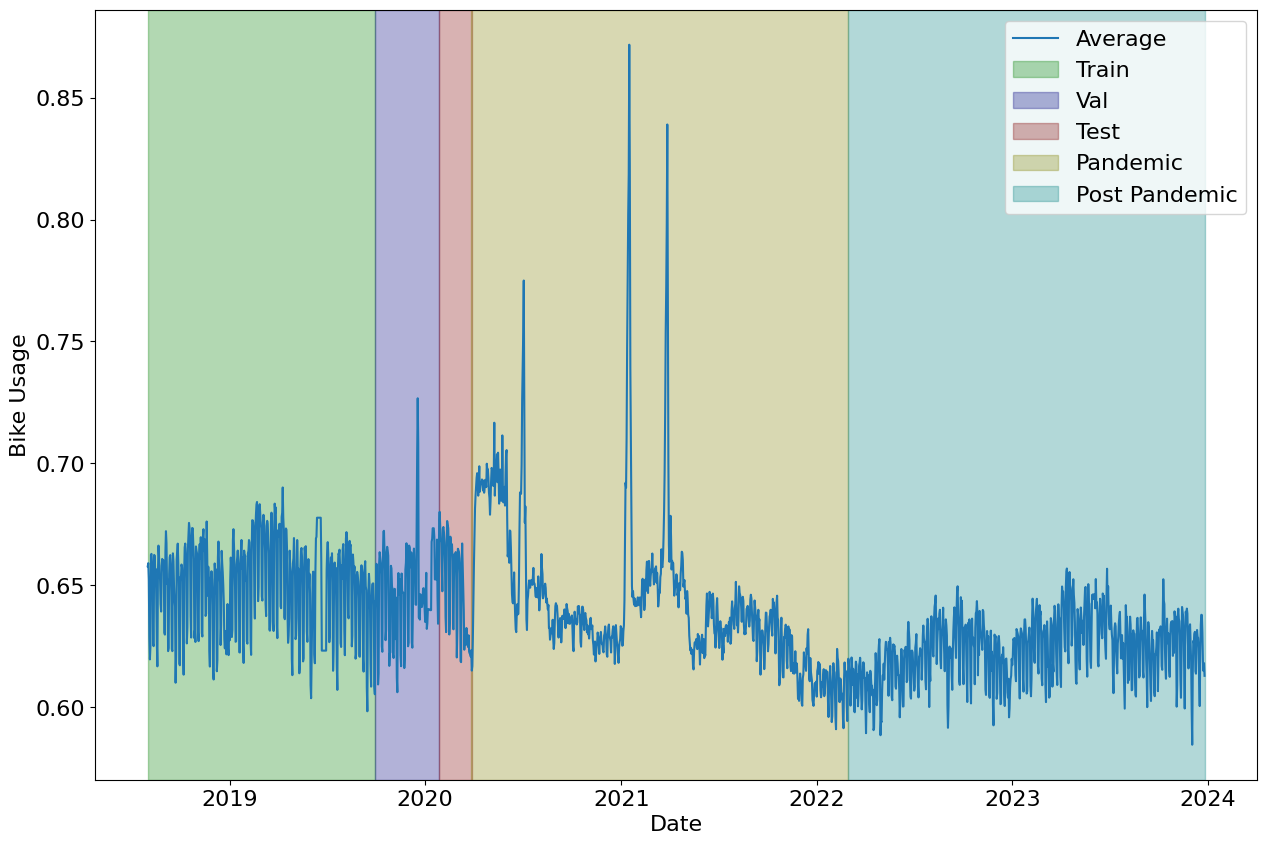

In [255]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ax.plot(data.resample("D")["BIKE USAGE"].mean(), label="Average")
#ax.plot(data.loc[data["ADDRESS"] == "Pearse Street"].resample("D")["BIKE USAGE"].mean(), label="Pearse Street", color=(0.5, 0.5, 0.0))

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd), ("2020-03-27", "2022-02-28"), ("2022-02-28", postPandemic.tail(1)["TIME"].iloc[0])]
labels = ["Train", "Val", "Test", "Pandemic", "Post Pandemic"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3), (0.5, 0.5, 0.0, 0.3), (0.0, 0.5, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.legend(loc="upper right")
ax.set_xlabel("Date")
ax.set_ylabel("Bike Usage")

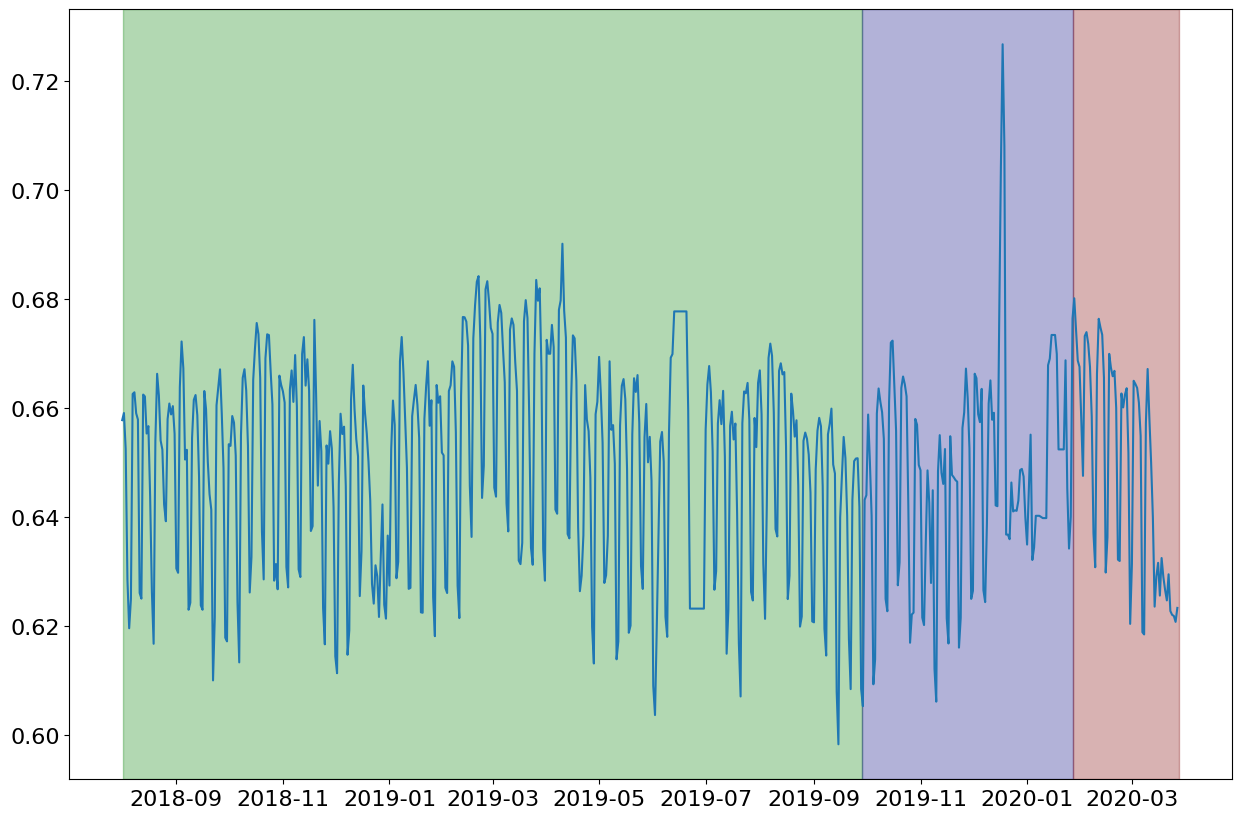

In [256]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd)]
labels = ["Train", "Val", "Test"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic.resample("D")["BIKE USAGE"].mean())

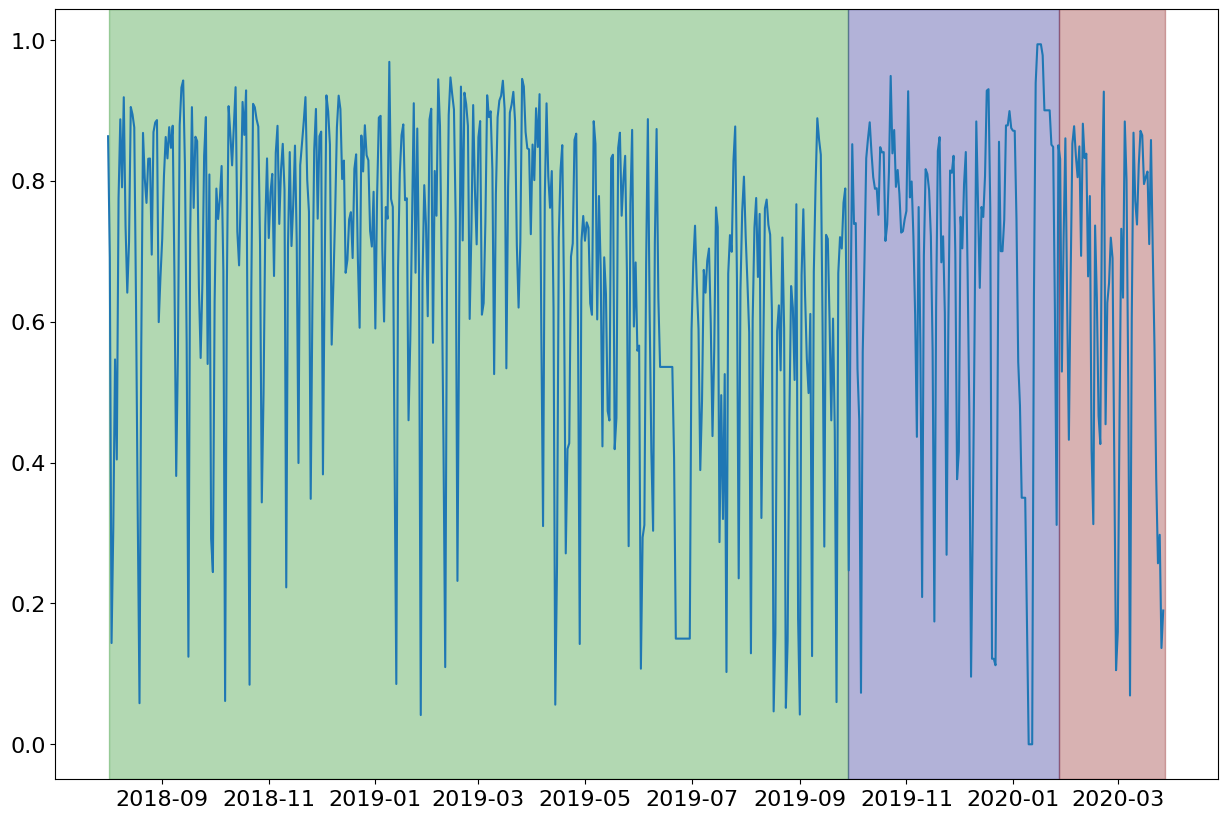

In [257]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart), (testStart, testEnd)]
labels = ["Train", "Val", "Test"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3), (0.5, 0.0, 0.0, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

ax.plot(prePandemic.loc[prePandemic["STATION ID"] == 4].resample("D")["BIKE USAGE"].mean())

## Evaluation

In [259]:
from sklearn.metrics import mean_absolute_error
import random

In [260]:
avgs = train.groupby(["STATION ID", "DAY OF WEEK", "HOUR OF DAY"])["BIKE USAGE"].mean()

In [261]:
for key in avgs.keys():
    if len(key) != 3:
        print("WRONG "+len(key))

In [262]:
class AveragePredictor:
    keyset_to_average = {}
    overall_average = 0.0
    
    def __init__(self, keyFeatures=["STATION ID", "DAY OF WEEK", "HOUR OF DAY"]):
        self.keyFeatures = keyFeatures

    def train(self, dataframe):
        averages = dataframe.groupby(self.keyFeatures)["BIKE USAGE"].mean()
        for key in averages.keys():
            if len(key) != 3:
                print("WRONG "+len(key))
            self.keyset_to_average[key] = averages[key]
        overall_average = dataframe["BIKE USAGE"].mean()

    def predict(self, dataframe):
        def lookup(key):
            key = tuple(key)
            if key in self.keyset_to_average:
                return self.keyset_to_average[key]
            else:
                return self.overall_average
        return dataframe[self.keyFeatures].apply(lookup, axis=1, raw=True)

    def evaluate(self, dataframe, metric):
        y_true = dataframe["BIKE USAGE"]
        y_pred = self.predict(dataframe)
        
        return metric(y_true, y_pred)

In [263]:
baseline = AveragePredictor()

In [264]:
baseline.train(train)

In [265]:
baseline.evaluate(train, mean_absolute_error)

0.15547245690183545

In [266]:
baseline.evaluate(val, mean_absolute_error)

0.19332209888658403

In [ ]:
baselineNoStation = AveragePredictor(keyFeatures=["DAY OF WEEK", "HOUR OF DAY"])
baselineNoStation.train(train)

In [267]:
prePandemicPreds = baseline.predict(prePandemic)

In [ ]:
ppns = baselineNoStation.predict(prePandemic)

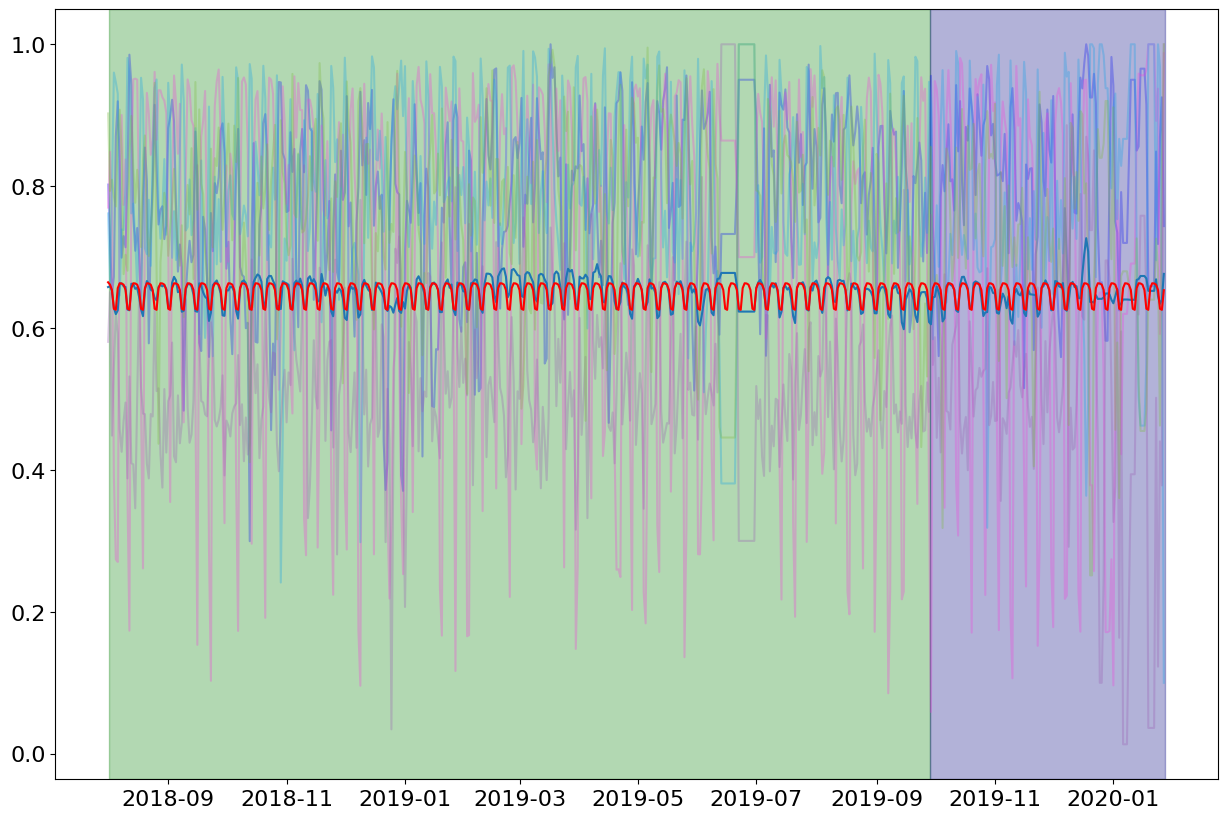

In [274]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

ranges = [(trainStart, valStart), (valStart, testStart)]
labels = ["Train", "Val"]
colors = [(0.0, 0.5, 0.0, 0.3), (0.0, 0.0, 0.5, 0.3)]

for range, label, color in zip(ranges, labels, colors):
    ax.axvspan(range[0], range[1], label=label, color=color)

for id in random.sample(list(prePandemic["STATION ID"].unique()), 5):
    data = prePandemic.loc[prePandemic["STATION ID"] == id][:testStart].resample("D")["BIKE USAGE"].mean()
    ax.plot(data, color=(random.random(), random.random(), random.random(), 0.3))

ax.plot(prePandemic[:testStart].resample("D")["BIKE USAGE"].mean(), label="Ground Truth")
ax.plot(prePandemicPreds[:testStart].resample("D").mean(), label="Predictions", color=(1, 0.0, 0.0))

NameError: name 'ppns' is not defined

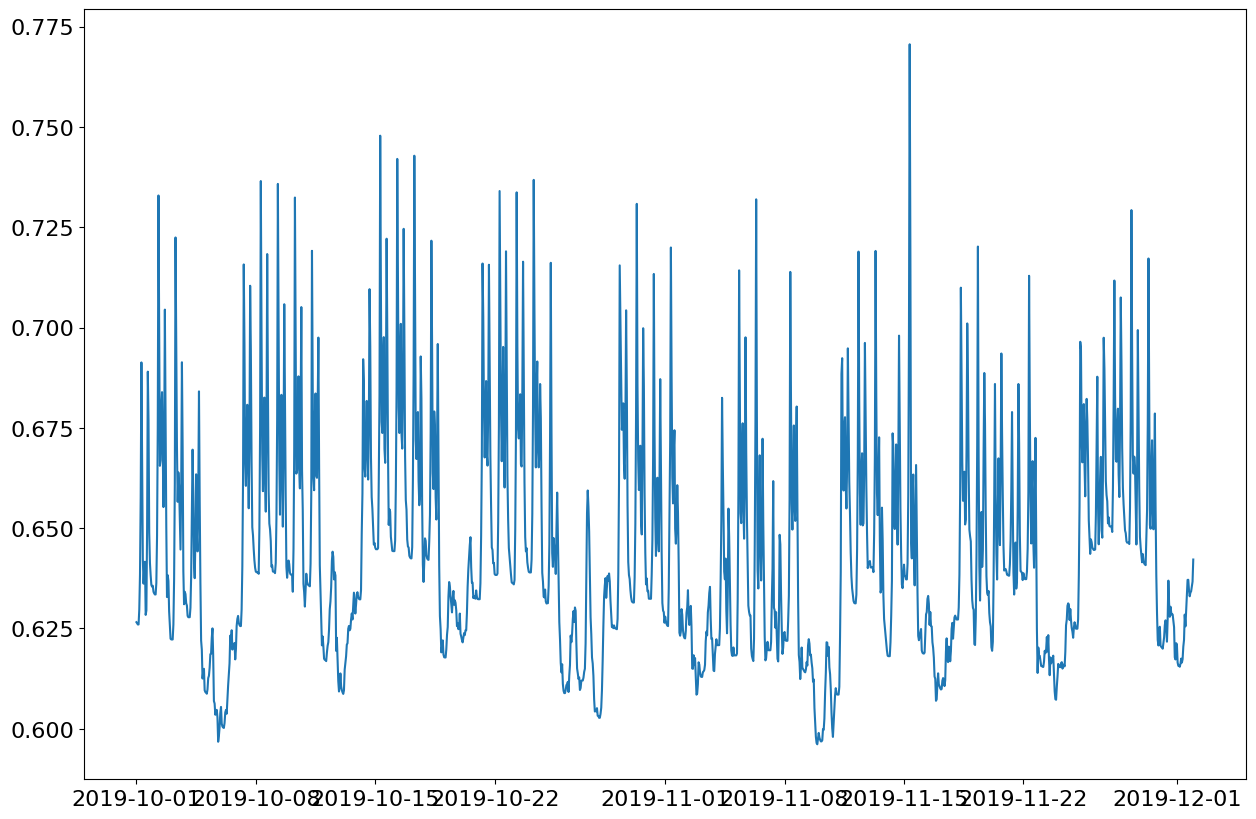

In [269]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

#range = ("2020-01-24", "2020-01-31")
range = ("2019-10-01", "2019-12-01")

ax.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean(), label="Ground Truth")
ax.plot(ppns[range[0]:range[1]].resample("H").mean(), label="Predictions", color=(1, 0.0, 0.0))

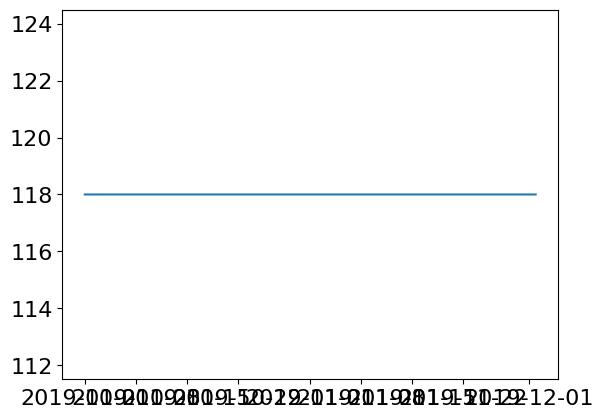

In [270]:
plt.plot(prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].count())

KeyError: 'STATIONID'

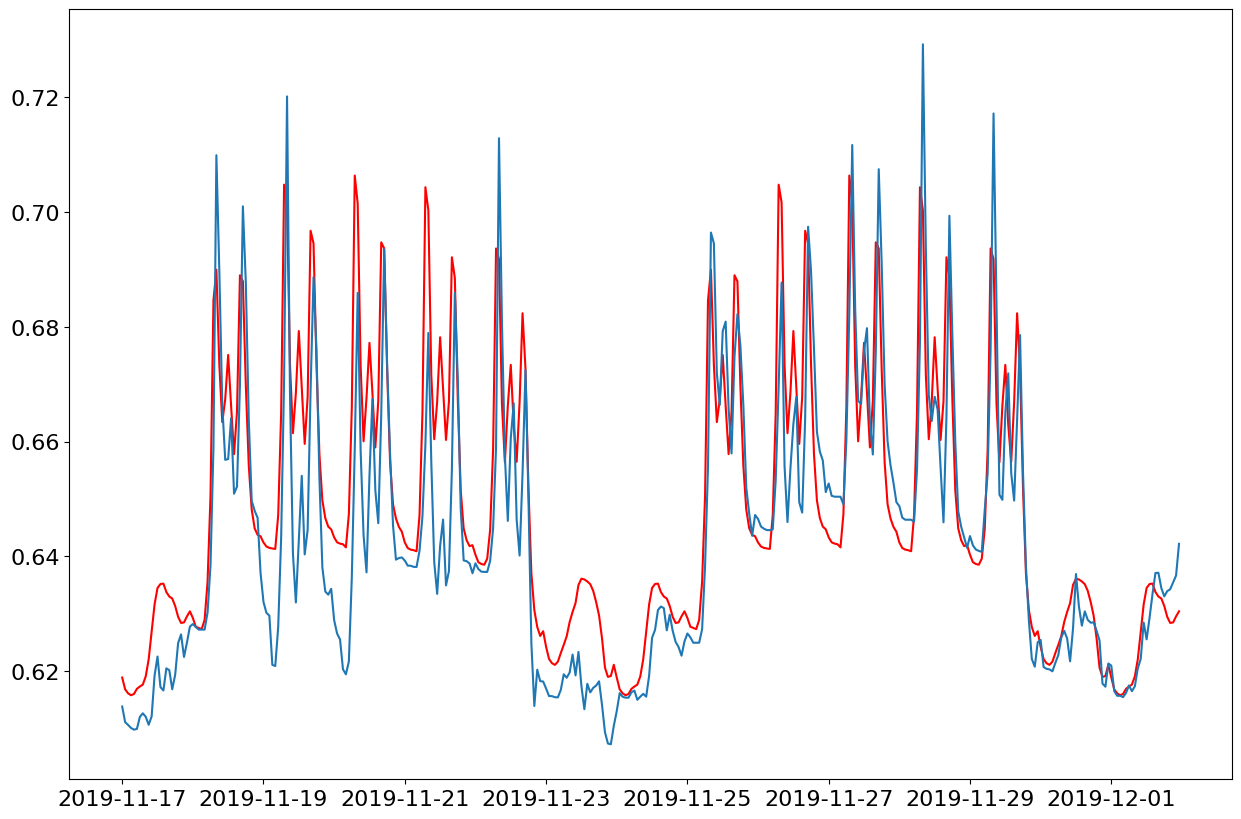

In [271]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

fontsize = 16

plt.rc('font', size=fontsize)
plt.rc('axes', labelsize=fontsize)
plt.rc('axes', titlesize=fontsize)
plt.rc('legend', fontsize=fontsize)
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)

#range = ("2020-01-24", "2020-01-31")
range = ("2019-11-17", "2019-12-01")

#groundTruth = prePandemic.loc[prePandemic["ADDRESS"] == "Heuston Station (Central)"][range[0]:range[1]].resample("H")["BIKE USAGE"].mean()
#preds = prePandemicPreds.loc[prePandemic["ADDRESS"] == "Heuston Station (Central)"][range[0]:range[1]].resample("H").mean()

groundTruth = prePandemic[range[0]:range[1]].resample("H")["BIKE USAGE"].mean()

preds = prePandemicPreds[range[0]:range[1]].resample("H").mean()
ax.plot(preds, label="Predictions for all", color=(1.0, 0.0, 0.0))

ax.plot(groundTruth, label="Ground Truth")
for id in random.sample(list(prePandemic["STATION ID"].unique()), 5):
    preds = prePandemicPreds.loc[prePandemic["STATIONID"] == id][range[0]:range[1]].resample("H").mean()
    ax.plot(preds, label="Predictions for "+id, color=(random.random(), random.random(), random.random(), 0.3))

In [ ]:
baseline.keyset_to_average

In [ ]:
i = iter(baseline.keyset_to_average.keys())

In [ ]:
next(i)

In [ ]:
with pandas.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(prePandemicPreds[range[0]:range[1]].resample("H").mean())

In [ ]:
for address in random.sample(list(prePandemic["ADDRESS"].unique()), 2):
    print(address)
    print(prePandemic.loc[prePandemic["ADDRESS"] == address][["DAY OF WEEK", "HOUR OF DAY"]].value_counts())